# Project 02 - Image Processing


## Student Information


- Full name: Nguyễn Lê Hồ Anh Khoa
- Student ID: 23127211
- Class: 23CLC09


## Required Libraries


In [72]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time


## Function Definitions


In [ ]:
def read_img(img_path):
    """
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    """
    try:
        img = Image.open(img_path).convert("RGB")
        img_array = np.array(img)
        return img_array
    except Exception as e:
        print(f"Lỗi đọc ảnh: {e}")
        return None


def show_img(img):
    """
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    """

    if img is not None:
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    else:

        print("Image is None, cannot display.")


def save_img(img, img_path):
    """
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    """
    try:
        img_to_save = Image.fromarray(img)
        img_to_save.save(img_path)
        print(f"Ảnh đã lưu vào {img_path}")
    except Exception as e:
        print(f"Lỗi lưu ảnh: {e}")


# --------------------------------------------------------------------------------


def increase_brightness(img_array: np.ndarray, offset: int) -> np.ndarray:
    """
    Adjust the brightness of the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input image array.
    value : int
        Value to add to each pixel (can be positive or negative).

    Returns
    -------
    np.ndarray
        Image array with adjusted brightness.
    """
    bright_array = img_array.astype(np.int32) + offset
    bright_array = np.clip(bright_array, 0, 255)
    return bright_array.astype(np.uint8)


def adjust_contrast(img_array: np.ndarray, contrast_factor: float) -> np.ndarray:
    """
    Adjust the contrast of the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input image array.
    factor : float
        Contrast adjustment factor (>1 increases contrast, <1 decreases contrast).

    Returns
    -------
    np.ndarray
        Image array with adjusted contrast.
    """
    if contrast_factor == 1.0:
        return img_array
    elif contrast_factor < 0:
        contrast_factor = -contrast_factor
    elif contrast_factor == 0:
        print("Contrast factor is 0, returning original image.")
        return img_array
    mean = np.mean(img_array)
    adjusted = (img_array - mean) * contrast_factor + mean
    adjusted = np.clip(adjusted, 0, 255).astype(np.uint8)
    return adjusted


def flip_horizontal(img_array: np.ndarray) -> np.ndarray:
    """
    Flip the image horizontally (left to right).

    Parameters
    ----------
    img_array : np.ndarray
        Input image array.

    Returns
    -------
    np.ndarray
        Horizontally flipped image array.
    """
    return img_array[:, ::-1, :]


def flip_vertical(img_array: np.ndarray) -> np.ndarray:
    """
    Flip the image vertically (top to bottom).

    Parameters
    ----------
    img_array : np.ndarray
        Input image array.

    Returns
    -------
    np.ndarray
        Vertically flipped image array.
    """
    return img_array[::-1, :, :]


def convert_to_grayscale(img_array: np.ndarray) -> np.ndarray:
    """
    Convert a color image to grayscale.

    Parameters
    ----------
    img_array : np.ndarray
        Input color image array.

    Returns
    -------
    np.ndarray
        Grayscale image array.
    """
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b
    gray_img = np.stack([gray, gray, gray], axis=2)
    return gray_img.astype(np.uint8)


def convert_to_sepia(img_array: np.ndarray) -> np.ndarray:
    """
    Apply a sepia tone effect to the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input color image array.

    Returns
    -------
    np.ndarray
        Image array with sepia effect applied.
    """
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    sepia_R = r * 0.393 + g * 0.769 + b * 0.189
    sepia_G = r * 0.349 + g * 0.686 + b * 0.168
    sepia_B = r * 0.272 + g * 0.534 + b * 0.131
    sepia_img = np.dstack((sepia_R, sepia_G, sepia_B))
    sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)
    return sepia_img


def apply_blur(img_array: np.ndarray) -> np.ndarray:
    """
    Apply a blur filter to the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input image array.
    kernel_size : int, optional
        Size of the blurring kernel, by default 3.

    Returns
    -------
    np.ndarray
        Blurred image array.
    """
    kernel_size = 5
    # Create kernel
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (
        kernel_size * kernel_size
    )

    pad_size = kernel_size // 2
    padded_img = np.pad(
        img_array, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode="reflect"
    )

    h, w, c = img_array.shape
    blurred_img = np.zeros((h, w, c), dtype=np.float32)

    for ch in range(c):
        for i in range(h):
            for j in range(w):
                region = padded_img[i : i + kernel_size, j : j + kernel_size, ch]
                blurred_img[i, j, ch] = np.sum(region * kernel)

    blurred_img = np.clip(blurred_img, 0, 255).astype(np.uint8)

    return blurred_img


def sharpen_image(img_array: np.ndarray) -> np.ndarray:
    """
    Apply sharpening filter to the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input image array.
    kernel_size : int, optional
        Size of the sharpening kernel, by default 3.

    Returns
    -------
    np.ndarray
        Sharpened image array.
    """
    height, width, _ = img_array.shape

    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    pad = 1  # kernel size = 3

    padded = np.pad(img_array, ((pad, pad), (pad, pad), (0, 0)), mode="constant")

    sharpened = np.zeros_like(img_array, dtype=float)

    for y in range(height):
        for x in range(width):
            for c in range(3):  # RGB
                region = padded[y : y + 3, x : x + 3, c]
                sharpened[y, x, c] = np.sum(region * kernel)

    result = np.clip(sharpened, 0, 255).astype(np.uint8)
    return result


def crop_center(img_array: np.ndarray, crop_height: int, crop_width: int) -> np.ndarray:
    """
    Crop the image to the specified size, centered in the middle of the original image.
    Parameters
    ----------
    img_array : np.ndarray
        Input image array (height, width, channels).
    crop_height : int
        Height of the cropped image.
    crop_width : int
        Width of the cropped image.
    Returns
    -------
    np.ndarray
        Cropped image array.
    """
    h, w, _ = img_array.shape

    start_y = (h - crop_height) // 2
    start_x = (w - crop_width) // 2

    end_y = start_y + crop_height
    end_x = start_x + crop_width

    cropped_img = img_array[start_y:end_y, start_x:end_x, :]

    return cropped_img


def crop_circle(img_array: np.ndarray) -> np.ndarray:
    """
    Crop the image into a circular mask inscribed within the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input image array (height, width, channels).

    Returns
    -------
    np.ndarray
        Circular cropped image array.
    """
    h, w, _ = img_array.shape

    radius = min(h, w) // 2

    center_y, center_x = h // 2, w // 2

    y, x = np.ogrid[:h, :w]
    mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= radius**2

    circular_img = np.zeros_like(img_array, dtype=np.uint8)
    for c in range(img_array.shape[2]):
        circular_img[:, :, c] = img_array[:, :, c] * mask

    return circular_img


def crop_ellipse(img_array: np.ndarray, size: float = 0.75) -> np.ndarray:
    """
    Crop the input image using a double crossed-ellipse mask.

    The function creates two rotated ellipses (crossed at 90 degrees) and keeps the region inside at least one ellipse.
    Useful for creating a decorative or focus effect on the image.

    Parameters
    ----------
    img_array : np.ndarray
        Input image array (grayscale or color).
    size : float, optional
        Ratio to control the axes of the ellipses relative to the image size (default is 0.75).

    Returns
    -------
    np.ndarray
        Image array after applying the double ellipse crop mask.
    """

    h, w, _ = img_array.shape

    y, x = np.ogrid[:h, :w]

    center_y, center_x = h // 2, w // 2

    mask_1 = (x + y - center_x - center_y) ** 2 / (size * h**2) + (
        x - y - center_x + center_y
    ) ** 2 / ((1 - size) * h**2) <= 1
    mask_2 = (x + y - center_x - center_y) ** 2 / ((1 - size) * h**2) + (
        x - y - center_x + center_y
    ) ** 2 / (size * h**2) <= 1

    mask = mask_1 | mask_2
    elliptical_image = np.zeros_like(img_array, dtype=np.uint8)
    for c in range(img_array.shape[2]):
        elliptical_image[:, :, c] = img_array[:, :, c] * mask

    result = elliptical_image.astype(np.uint8)
    return result


<ins>Note:</ins> For clarity, include docstrings with each function.


## Your tests


In [ ]:
# YOUR CODE HERE


## Main FUNCTION


In [76]:
def main():
    """
    Main function to process the image based on user input and measure execution time for each function.
    """
    # Nhập tên tập tin ảnh
    img_path = input("Nhập tên tập tin ảnh (ví dụ: cat.png): ")
    img_array = read_img(img_path)

    if img_array is None:
        print("Không thể đọc ảnh. Vui lòng kiểm tra lại tên tập tin.")
        return

    # Loại bỏ hậu tố ban đầu
    base_name = ".".join(img_path.split(".")[:-1])

    # Hiển thị menu chức năng
    print("Chọn chức năng xử lý ảnh:")
    print("1. Thay đổi độ sáng")
    print("2. Thay đổi độ tương phản")
    print("3. Lật ảnh ngang")
    print("4. Lật ảnh dọc")
    print("5. Chuyển đổi ảnh RGB thành ảnh xám")
    print("6. Chuyển đổi ảnh RGB thành ảnh sepia")
    print("7. Làm mờ ảnh")
    print("8. Làm sắt nét ảnh")
    print("9. Cắt ảnh theo kích thước (cắt ở trung tâm)")
    print("10. Cắt ảnh theo khung hình tròn")
    print("11. Cắt ảnh theo khung hình elip")
    print("0. Thực hiện tất cả chức năng")
    show_img(img_array)

    # Nhập lựa chọn chức năng
    choice = int(input("Nhập lựa chọn của bạn (0-11): "))

    if choice == 1 or choice == 0:
        offset = int(input("Nhập giá trị độ sáng (ví dụ: 50): "))
        start_time = time.time()
        bright_img = increase_brightness(img_array, offset)
        end_time = time.time()
        show_img(bright_img)
        save_img(bright_img, f"{base_name}_bright.png")
        print(f"Thời gian thực thi chức năng tăng độ sáng: {end_time - start_time:.2f} giây")

    if choice == 2 or choice == 0:
        contrast_factor = float(input("Nhập hệ số tương phản (ví dụ: 1.5): "))
        start_time = time.time()
        contrast_img = adjust_contrast(img_array, contrast_factor)
        end_time = time.time()
        show_img(contrast_img)
        save_img(contrast_img, f"{base_name}_contrast.png")
        print(f"Thời gian thực thi chức năng tăng độ tương phản: {end_time - start_time:.2f} giây")

    if choice == 3 or choice == 0:
        start_time = time.time()
        flipped_img = flip_horizontal(img_array)
        end_time = time.time()
        show_img(flipped_img)
        save_img(flipped_img, f"{base_name}_flip_horizontal.png")
        print(f"Thời gian thực thi chức năng lật ảnh ngang: {end_time - start_time:.2f} giây")

    if choice == 4 or choice == 0:
        start_time = time.time()
        flipped_img = flip_vertical(img_array)
        end_time = time.time()
        show_img(flipped_img)
        save_img(flipped_img, f"{base_name}_flip_vertical.png")
        print(f"Thời gian thực thi chức năng lật ảnh dọc: {end_time - start_time:.2f} giây")

    if choice == 5 or choice == 0:
        start_time = time.time()
        grayscale_img = convert_to_grayscale(img_array)
        end_time = time.time()
        show_img(grayscale_img)
        save_img(grayscale_img, f"{base_name}_grayscale.png")
        print(f"Thời gian thực thi chức năng chuyển đổi ảnh xám: {end_time - start_time:.2f} giây")

    if choice == 6 or choice == 0:
        start_time = time.time()
        sepia_img = convert_to_sepia(img_array)
        end_time = time.time()
        show_img(sepia_img)
        save_img(sepia_img, f"{base_name}_sepia.png")
        print(f"Thời gian thực thi chức năng chuyển đổi ảnh sepia: {end_time - start_time:.2f} giây")

    if choice == 7 or choice == 0:
        start_time = time.time()
        blurred_img = apply_blur(img_array)
        end_time = time.time()
        show_img(blurred_img)
        save_img(blurred_img, f"{base_name}_blur.png")
        print(f"Thời gian thực thi chức năng làm mờ ảnh: {end_time - start_time:.2f} giây")

    if choice == 8 or choice == 0:
        start_time = time.time()
        sharpened_img = sharpen_image(img_array)
        end_time = time.time()
        show_img(sharpened_img)
        save_img(sharpened_img, f"{base_name}_sharpened.png")
        print(f"Thời gian thực thi chức năng làm sắt nét ảnh: {end_time - start_time:.2f} giây")

    if choice == 9 or choice == 0:
        crop_height = int(input("Nhập chiều cao vùng cắt (ví dụ: 200): "))
        start_time = time.time()
        cropped_img = crop_center(img_array, crop_height, crop_height)
        end_time = time.time()
        show_img(cropped_img)
        save_img(cropped_img, f"{base_name}_crop_center.png")
        print(f"Thời gian thực thi chức năng cắt ảnh: {end_time - start_time:.2f} giây")

    if choice == 10 or choice == 0:
        start_time = time.time()
        circular_img = crop_circle(img_array)
        end_time = time.time()
        show_img(circular_img)
        save_img(circular_img, f"{base_name}_crop_circle.png")
        print(f"Thời gian thực thi chức năng cắt ảnh hình tròn: {end_time - start_time:.2f} giây")

    if choice == 11 or choice == 0:
        input_size = float(input("Nhập tỉ lệ kích thước elip (0.5 <= ratio <= 1): "))
        start_time = time.time()
        elliptical_img = crop_ellipse(img_array, input_size)
        end_time = time.time()
        show_img(elliptical_img)
        save_img(elliptical_img, f"{base_name}_crop_ellipse.png")
        print(f"Thời gian thực thi chức năng cắt ảnh hình elip: {end_time - start_time:.2f} giây")

    print("Xử lý hoàn tất!")


Chọn chức năng xử lý ảnh:
1. Thay đổi độ sáng
2. Thay đổi độ tương phản
3. Lật ảnh ngang
4. Lật ảnh dọc
5. Chuyển đổi ảnh RGB thành ảnh xám
6. Chuyển đổi ảnh RGB thành ảnh sepia
7. Làm mờ ảnh
8. Làm sắt nét ảnh
9. Cắt ảnh theo kích thước (cắt ở trung tâm)
10. Cắt ảnh theo khung hình tròn
11. Cắt ảnh theo khung hình elip
0. Thực hiện tất cả chức năng


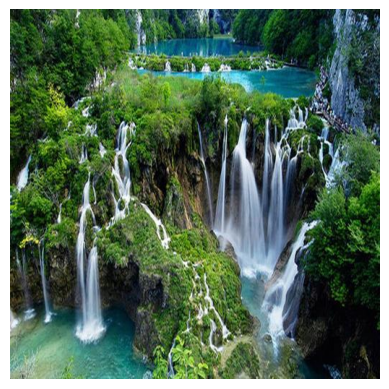

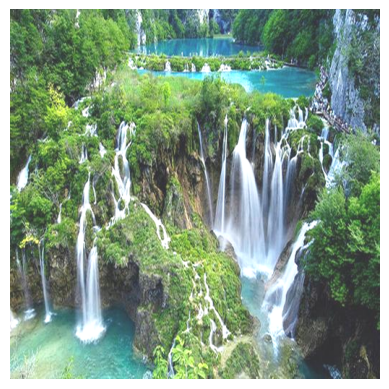

Image saved to 512_bright.png
Thời gian thực thi chức năng tăng độ sáng: 0.01 giây


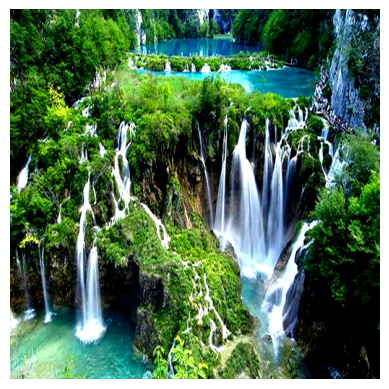

Image saved to 512_contrast.png
Thời gian thực thi chức năng tăng độ tương phản: 0.01 giây


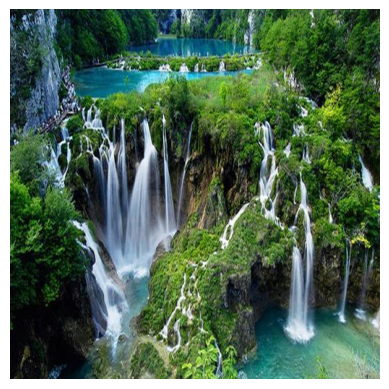

Image saved to 512_flip_horizontal.png
Thời gian thực thi chức năng lật ảnh ngang: 0.00 giây


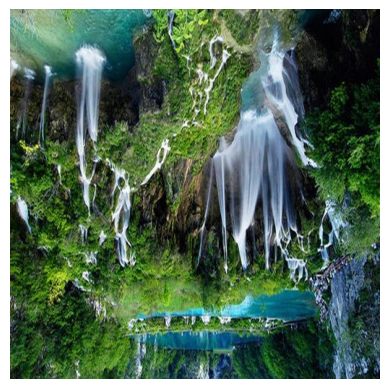

Image saved to 512_flip_vertical.png
Thời gian thực thi chức năng lật ảnh dọc: 0.00 giây


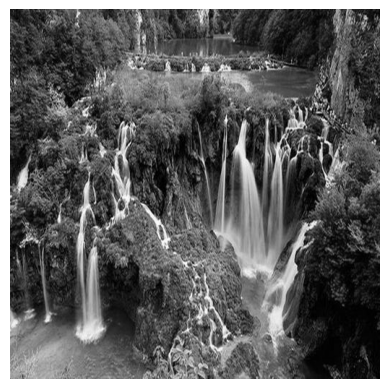

Image saved to 512_grayscale.png
Thời gian thực thi chức năng chuyển đổi ảnh xám: 0.01 giây


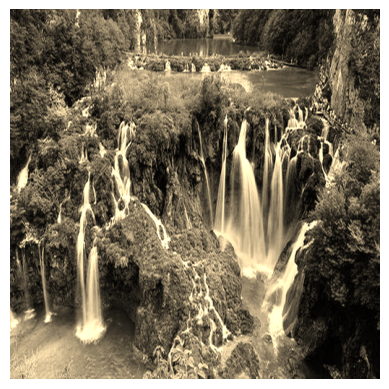

Image saved to 512_sepia.png
Thời gian thực thi chức năng chuyển đổi ảnh sepia: 0.07 giây


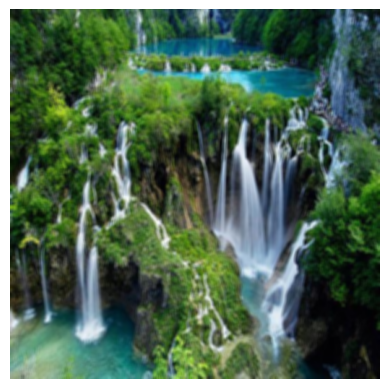

Image saved to 512_blur.png
Thời gian thực thi chức năng làm mờ ảnh: 7.79 giây


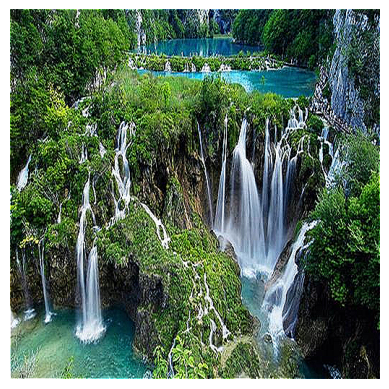

Image saved to 512_sharpened.png
Thời gian thực thi chức năng làm sắt nét ảnh: 8.08 giây


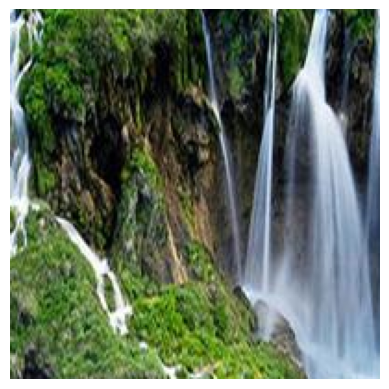

Image saved to 512_crop_center.png
Thời gian thực thi chức năng cắt ảnh: 0.00 giây


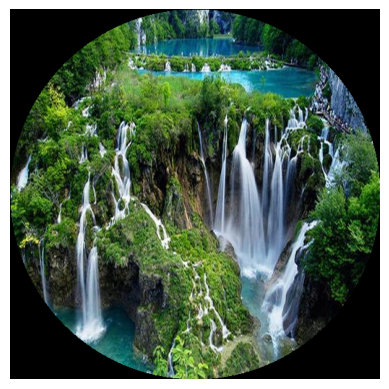

Image saved to 512_crop_circle.png
Thời gian thực thi chức năng cắt ảnh hình tròn: 0.00 giây


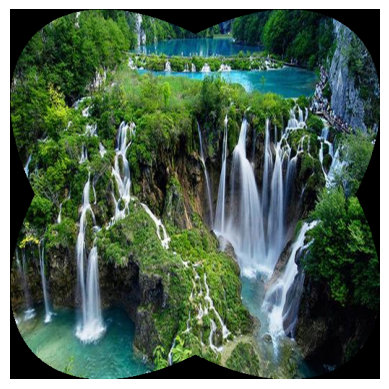

Image saved to 512_crop_ellipse.png
Thời gian thực thi chức năng cắt ảnh hình elip: 0.03 giây
Xử lý hoàn tất!


In [77]:
if __name__ == "__main__":
    main()
